In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [102]:
path = '/home/malpizar/Documents/Life_Expectancy/'
file = 'Life Expectancy Data.csv'

df = pd.read_csv(path + file)
df = df.dropna()
df = df.rename(columns={'Life expectancy ': 'Life expectancy'})
df['Status'] = df['Status'].replace('Developed', 1.0)
df['Status'] = df['Status'].replace('Developing', 0.0)

X = df.drop(['Life expectancy', 'Country'], axis=1)

# Select the dependent variable
y = df['Life expectancy'] 

#separate in trainning and test sets by year
#X_train = df[df['Year'] < 2011]
#X_test = df[df['Year'] > 2010]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the LinearRegression model
model = LinearRegression()

# Fit the model to the data
#model.fit(X, y)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict values for column C using the model
#predictions = model.predict(X)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

# Print the predicted values
#print(y_pred)


# Print the R-squared score
print("R-squared score (1 is perfect, 0 is worst possible fit): ", r2)

# Print the predicted values
#print(predictions)

#print(df['Life expectancy'])

coefficients = model.coef_

# Create a DataFrame to display the coefficients
coefficients_df = pd.DataFrame({'Variable': ['Year', 'Status', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'], 'Coefficient': coefficients})

# Sort the coefficients by magnitude
coefficients_df = coefficients_df.reindex(coefficients_df['Coefficient'].abs().sort_values(ascending=False).index)

# Print the coefficients
print(coefficients_df)

R-squared score (1 is perfect, 0 is worst possible fit):  0.8167489605227849
                           Variable   Coefficient
18  Income composition of resources  9.484340e+00
19                        Schooling  9.664187e-01
1                            Status  9.316611e-01
13                         HIV/AIDS -4.403252e-01
4                           Alcohol -1.499454e-01
0                              Year -1.132819e-01
11                Total expenditure  1.060689e-01
3                     infant deaths  9.211325e-02
9                under-five deaths  -6.939482e-02
17               thinness 5-9 years -4.689987e-02
16             thinness  1-19 years -3.999109e-02
8                              BMI   2.617831e-02
2                   Adult Mortality -1.620928e-02
12                      Diphtheria   1.424346e-02
10                            Polio  7.926452e-03
6                       Hepatitis B -5.984424e-03
5            percentage expenditure  3.429998e-04
14                     

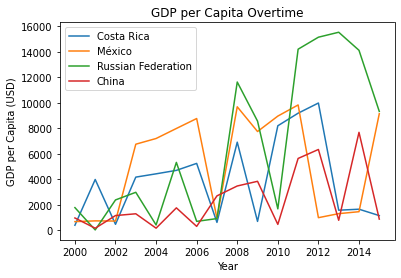

In [58]:
unique_values = df['Country'].unique()

#print(unique_values)

# Print the unique values
#for value in unique_values:
    #print(value)

  
    
#print(df.head())
#print(df.columns)

df_CRC = df[df['Country'] == 'Costa Rica']
df_MEX = df[df['Country'] == 'Mexico']
df_RUS = df[df['Country'] == 'Russian Federation']
df_CHN = df[df['Country'] == 'China']

years = df_CRC['Year'].values
GDP_CRC = df_CRC['GDP'].values
GDP_MEX = df_MEX['GDP'].values
GDP_RUS = df_RUS['GDP'].values
GDP_CHN = df_CHN['GDP'].values

#print(df_CR[['Year', 'GDP']])
#print(years, GDP_CRC)

plt.plot(years, GDP_CRC, label = 'Costa Rica')
plt.plot(years, GDP_MEX, label = 'México')
plt.plot(years, GDP_RUS, label = 'Russian Federation')
plt.plot(years, GDP_CHN, label = 'China')
#plt.ylim(0, 100000)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('GDP per Capita (USD)')
plt.title('GDP per Capita Overtime')

# Display the plot
plt.legend()
plt.show()